<a href="https://colab.research.google.com/github/N-Linh/ML/blob/main/gradient_descent_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

create data

In [67]:
X = 1 + 2*np.random.rand(200, 1)
y = 2 + 3*X + np.random.randn(200, 1)
X.shape, y.shape#np.random.randn is normal distribution may be < 0

((200, 1), (200, 1))

Text(0, 0.5, '$y$')

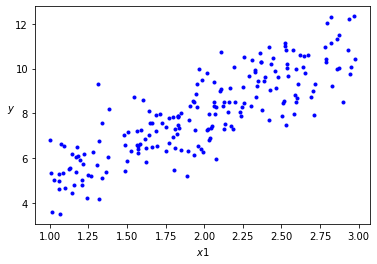

In [68]:
plt.plot(X, y, "b.")
plt.xlabel("$x1$")
plt.ylabel("$y$", rotation=0)

In [69]:
min(X), min(y)

(array([1.00340653]), array([3.51391902]))

Find the best line fit the data

In [70]:
X_ones = np.ones((200, 1))
X_com = np.c_[X_ones, X]
X_com.shape

(200, 2)

In [71]:
X_pred = np.array([[1], [3]])
X_pred_com = np.c_[np.ones((2, 1)), X_pred]
X_pred.shape

(2, 1)

Normal Equation

In [72]:
theta_ne = np.dot(np.linalg.pinv(np.dot(X_com.T, X_com)), np.dot(X_com.T, y))
theta_ne, theta_ne.shape

(array([[2.13018654],
        [2.94074755]]), (2, 1))

In [73]:
y_pred_ne = np.dot(X_pred_com, theta_ne)
y_pred_ne

array([[ 5.0709341 ],
       [10.95242921]])

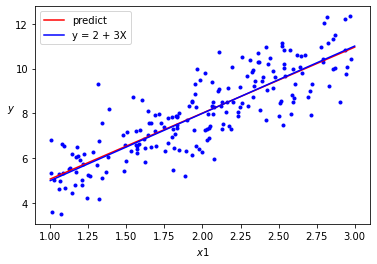

In [74]:
plt.plot(X, y, "b.")
plt.plot(X_pred, y_pred_ne, "r-", label="predict")
plt.xlabel("$x1$")
plt.ylabel("$y$", rotation=0)
plt.plot(np.array([[1], [3]]), 2 + 3*np.array([[1], [3]]), "b-", label="y = 2 + 3X")
plt.legend(loc="upper left")

normal equation best theta: 

In [75]:
theta_ne

array([[2.13018654],
       [2.94074755]])

Batch Gradient Descent

In [196]:
thetas_b = []

array([[2.12620038],
       [2.94264378]])

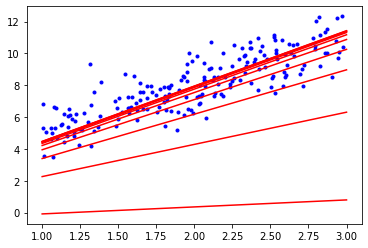

In [205]:
epochs = 1000
m = len(X)#number of sample
lr = 0.05
theta_b = np.random.randn(2, 1)
plt.plot(X, y, "b.")
for epoch in range(epochs):
  if epoch < 10:
    plt.plot(X_pred, np.dot(X_pred_com, theta_b), "r-")
  grad = 2/m * np.dot(X_com.T, np.dot(X_com, theta_b) - y)
  thetas_b.append(theta_b)
  theta_b = theta_b - lr*grad
theta_b

In [206]:
def batch_gd(lr, theta_b):
  epochs = 1000
  m = len(X)
  plt.plot(X, y, "b.")
  for epoch in range(epochs):
    if epoch < 10:
      plt.plot(X_pred, np.dot(X_pred_com, theta_b), "r-")#np.dot(X_pred_com, theta_b) predict X_pred with each theta
    grad = 2/m * np.dot(X_com.T, np.dot(X_com, theta_b) - y)
    theta_b = theta_b - lr*grad
  plt.xlabel("$x1$")
  plt.ylabel("$y$", rotation=0)
  plt.title("learning rate = " +  str(lr))



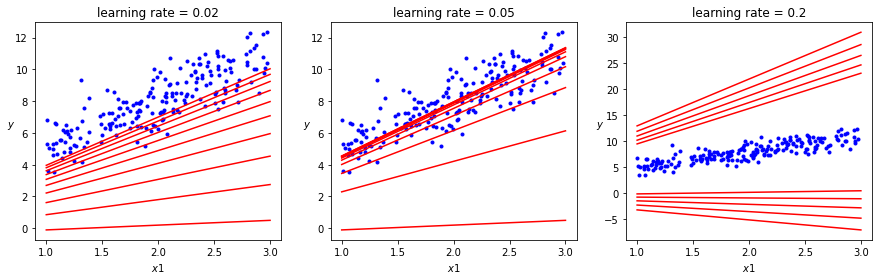

In [207]:
theta_ = np.random.randn(2, 1)
plt.figure(figsize=(15,4))
plt.subplot(131); batch_gd(0.02, theta_)
plt.subplot(132); batch_gd(0.05, theta_)
plt.subplot(133); batch_gd(0.2, theta_)
#3 value learning rate 0.02, 0.06, 0.2, 100 epochs

best theta using batch gradient descent with learning rate = 0.05, epochs = 1000:

In [208]:
theta_b

array([[2.12620038],
       [2.94264378]])

Stochastic Gradient Descent

In [209]:
thetas_s = []

In [210]:
lr = 0.05
theta_s = np.random.randn(2, 1)
epochs = 50
m = len(X)

for epoch in range(epochs):
  for index in range(m):
    random_index = np.random.randint(m)
    X_rand = X_com[random_index: random_index + 1]
    y_rand = y[random_index: random_index + 1]
    grad = (2/1) * np.dot(X_rand.T, np.dot(X_rand, theta_s) - y_rand)
    theta_s = theta_s - lr*grad
theta_s

array([[2.12237351],
       [3.11091993]])

array([[1.76976726],
       [3.11455902]])

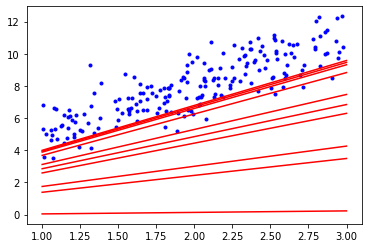

In [211]:
def learning_rate_reduct(t):
  return 1/(t + 10)
lr = 0.05
theta_s = np.random.randn(2, 1)
epochs = 50
m = len(X)

plt.plot(X, y, "b.")

for epoch in range(epochs):
  for index in range(m):
    if epoch == 0 and index < 10:
      plt.plot(X_pred, np.dot(X_pred_com, theta_s), "r-")
    random_index = np.random.randint(m)
    X_rand = X_com[random_index: random_index + 1]
    y_rand = y[random_index: random_index + 1]
    grad = (2/1) * np.dot(X_rand.T, np.dot(X_rand, theta_s) - y_rand)
    lr = learning_rate_reduce(epoch*m + index)
    thetas_s.append(theta_s)
    theta_s = theta_s - lr*grad
theta_s

best theta using stochastic gradient descent:

In [212]:
theta_s

array([[1.76976726],
       [3.11455902]])

Mini-Batch Gradient Descent

In [213]:
thetas_m = []

In [214]:
epochs = 50
lr = 0.05#can use learning rate reduce
theta_m = np.random.randn(2, 1)
m = 200
mini_batch = 40
for epoch in range(epochs):
  random_index = np.random.permutation(m)
  X_rand = X_com[random_index]
  y_rand = y[random_index]
  for i in range(0, m, mini_batch):
    X_rand_split = X_rand[i: i + mini_batch]
    y_rand_split = y_rand[i: i + mini_batch]
    grad = 2/mini_batch * np.dot(X_rand_split.T, np.dot(X_rand_split, theta_m) - y_rand_split)
    thetas_m.append(theta_m)
    theta_m = theta_m - lr*grad 
theta_m

array([[2.2011413 ],
       [2.95893762]])

best theta using mini-batch gradient descent:

In [215]:
theta_m

array([[2.2011413 ],
       [2.95893762]])